In [1]:
!pip show numpy

Name: numpy
Version: 1.21.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\users\peggy yu\appdata\roaming\python\python38\site-packages
Requires: 
Required-by: tensorflow, opt-einsum, Keras-Preprocessing, xgboost, udicOpenData, transformers, tifffile, tensorboard, tables, Swinger, streamlit, statsmodels, simpletransformers, seqeval, seaborn, scipy, scikit-learn, scikit-image, PyWavelets, pydeck, pyarrow, patsy, pandas, numexpr, numba, mkl-random, mkl-fft, matplotlib, KeyMojiAPI, imageio, h5py, gensim, datasets, cnsenti, Bottleneck, bokeh, bkcharts, astropy, altair


In [7]:
# 查看前幾筆資料
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df = pd.read_csv("HW3_Credit Card Dataset.csv", header=0)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
# 查看資料的資訊 -> 發現有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# 用平均值填補缺失的部分
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean()))

In [11]:
# 用平均值填補缺失的部分
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [12]:
# 查看是否仍有缺失值 -> 確定都填補完成
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# 資料的敘述性統計總表
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449400,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
# 把無用的 CUST_ID 欄位資料移除
df = df.drop(columns = ['CUST_ID'])

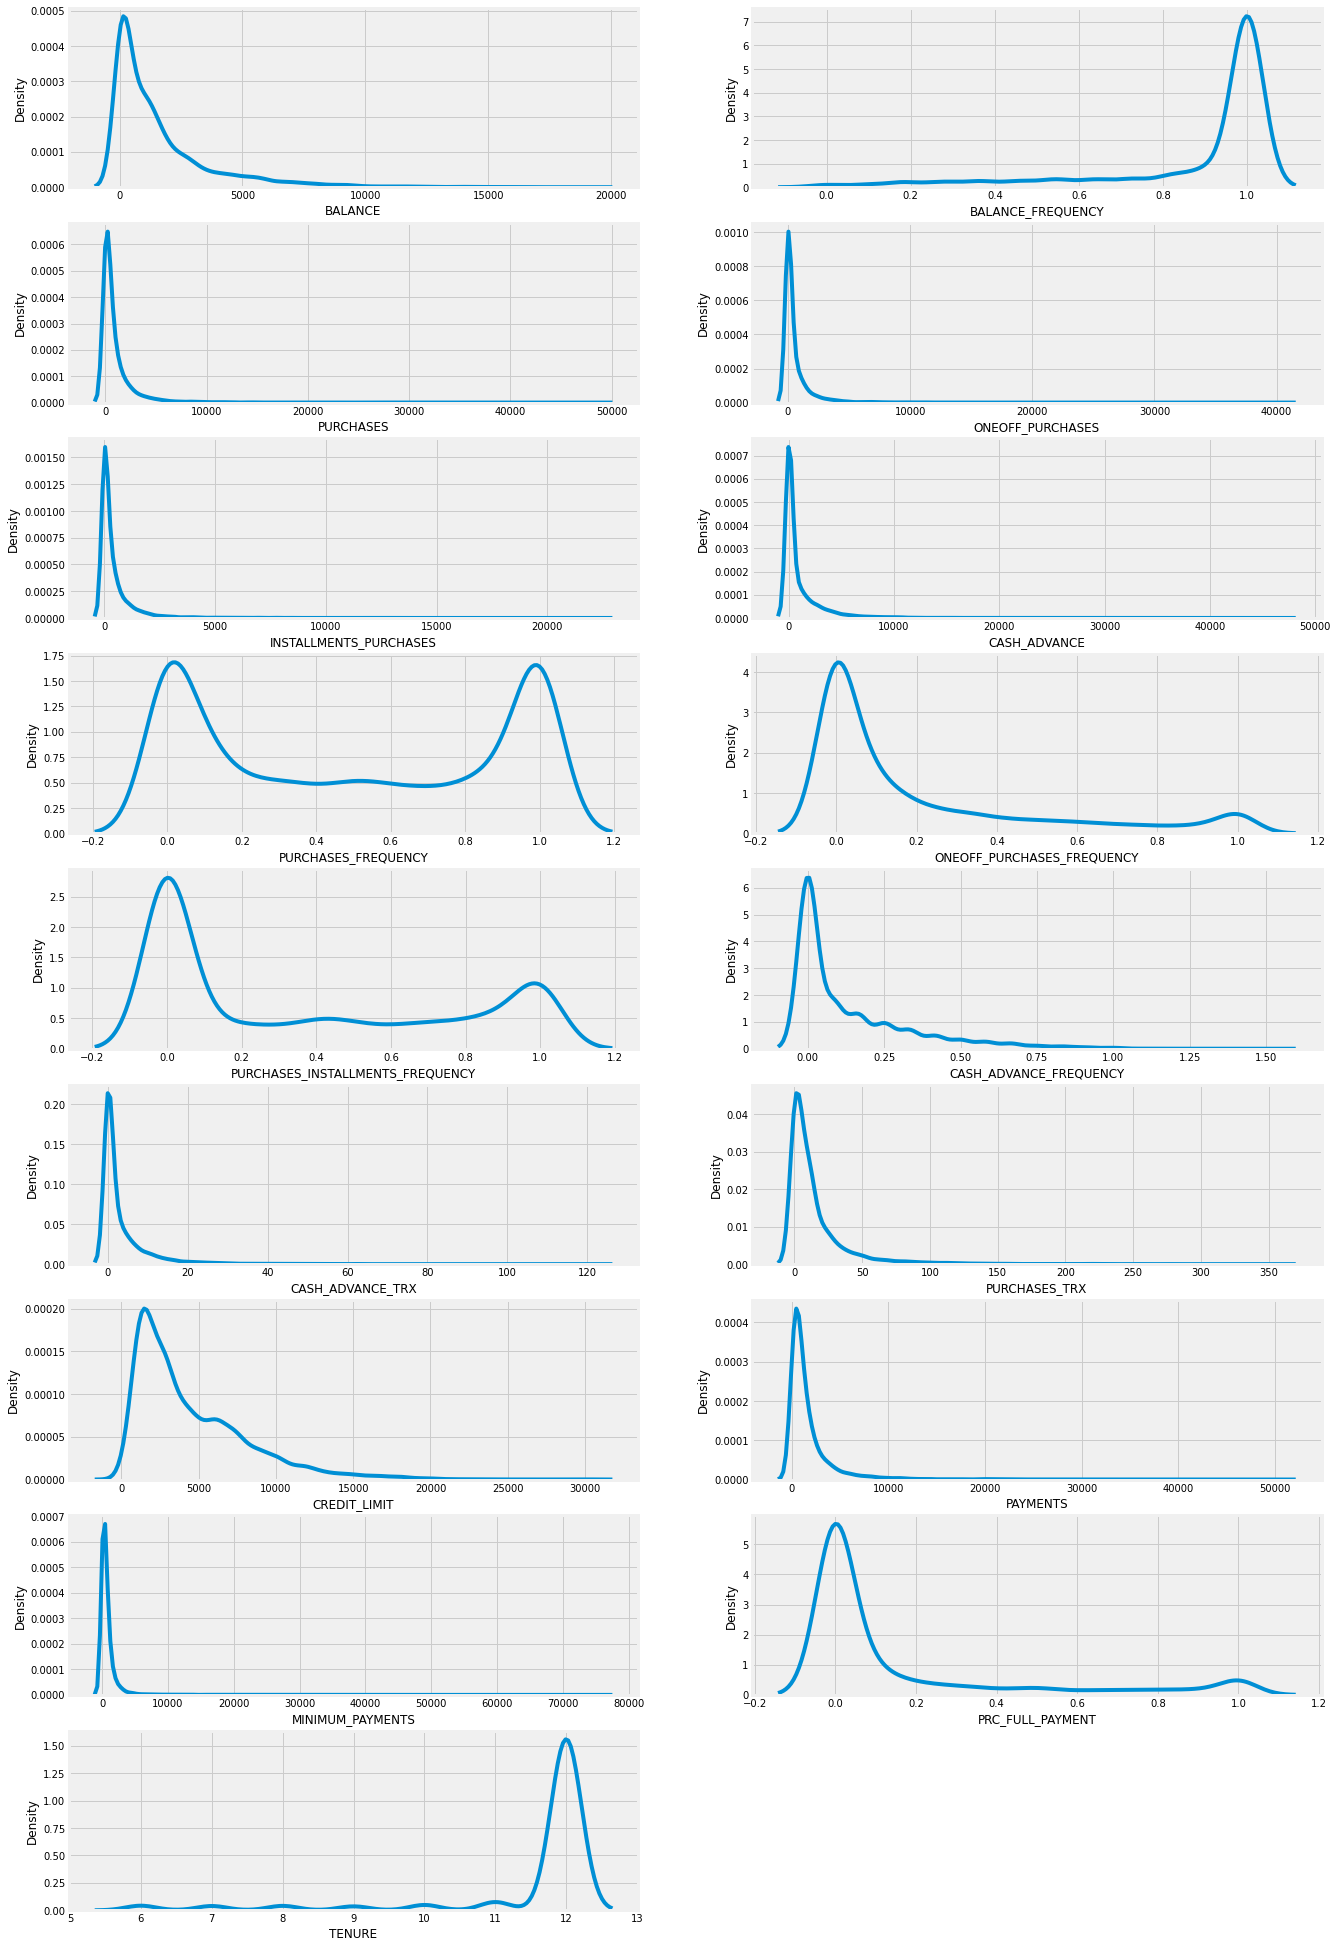

In [15]:
# 查看資料的偏移狀況
import seaborn as sns

plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [16]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [17]:
# 用 log(1 + df[col]) 將資料進行偏移調整
for col in cols:
    df[col] = np.log(1 + df[col])

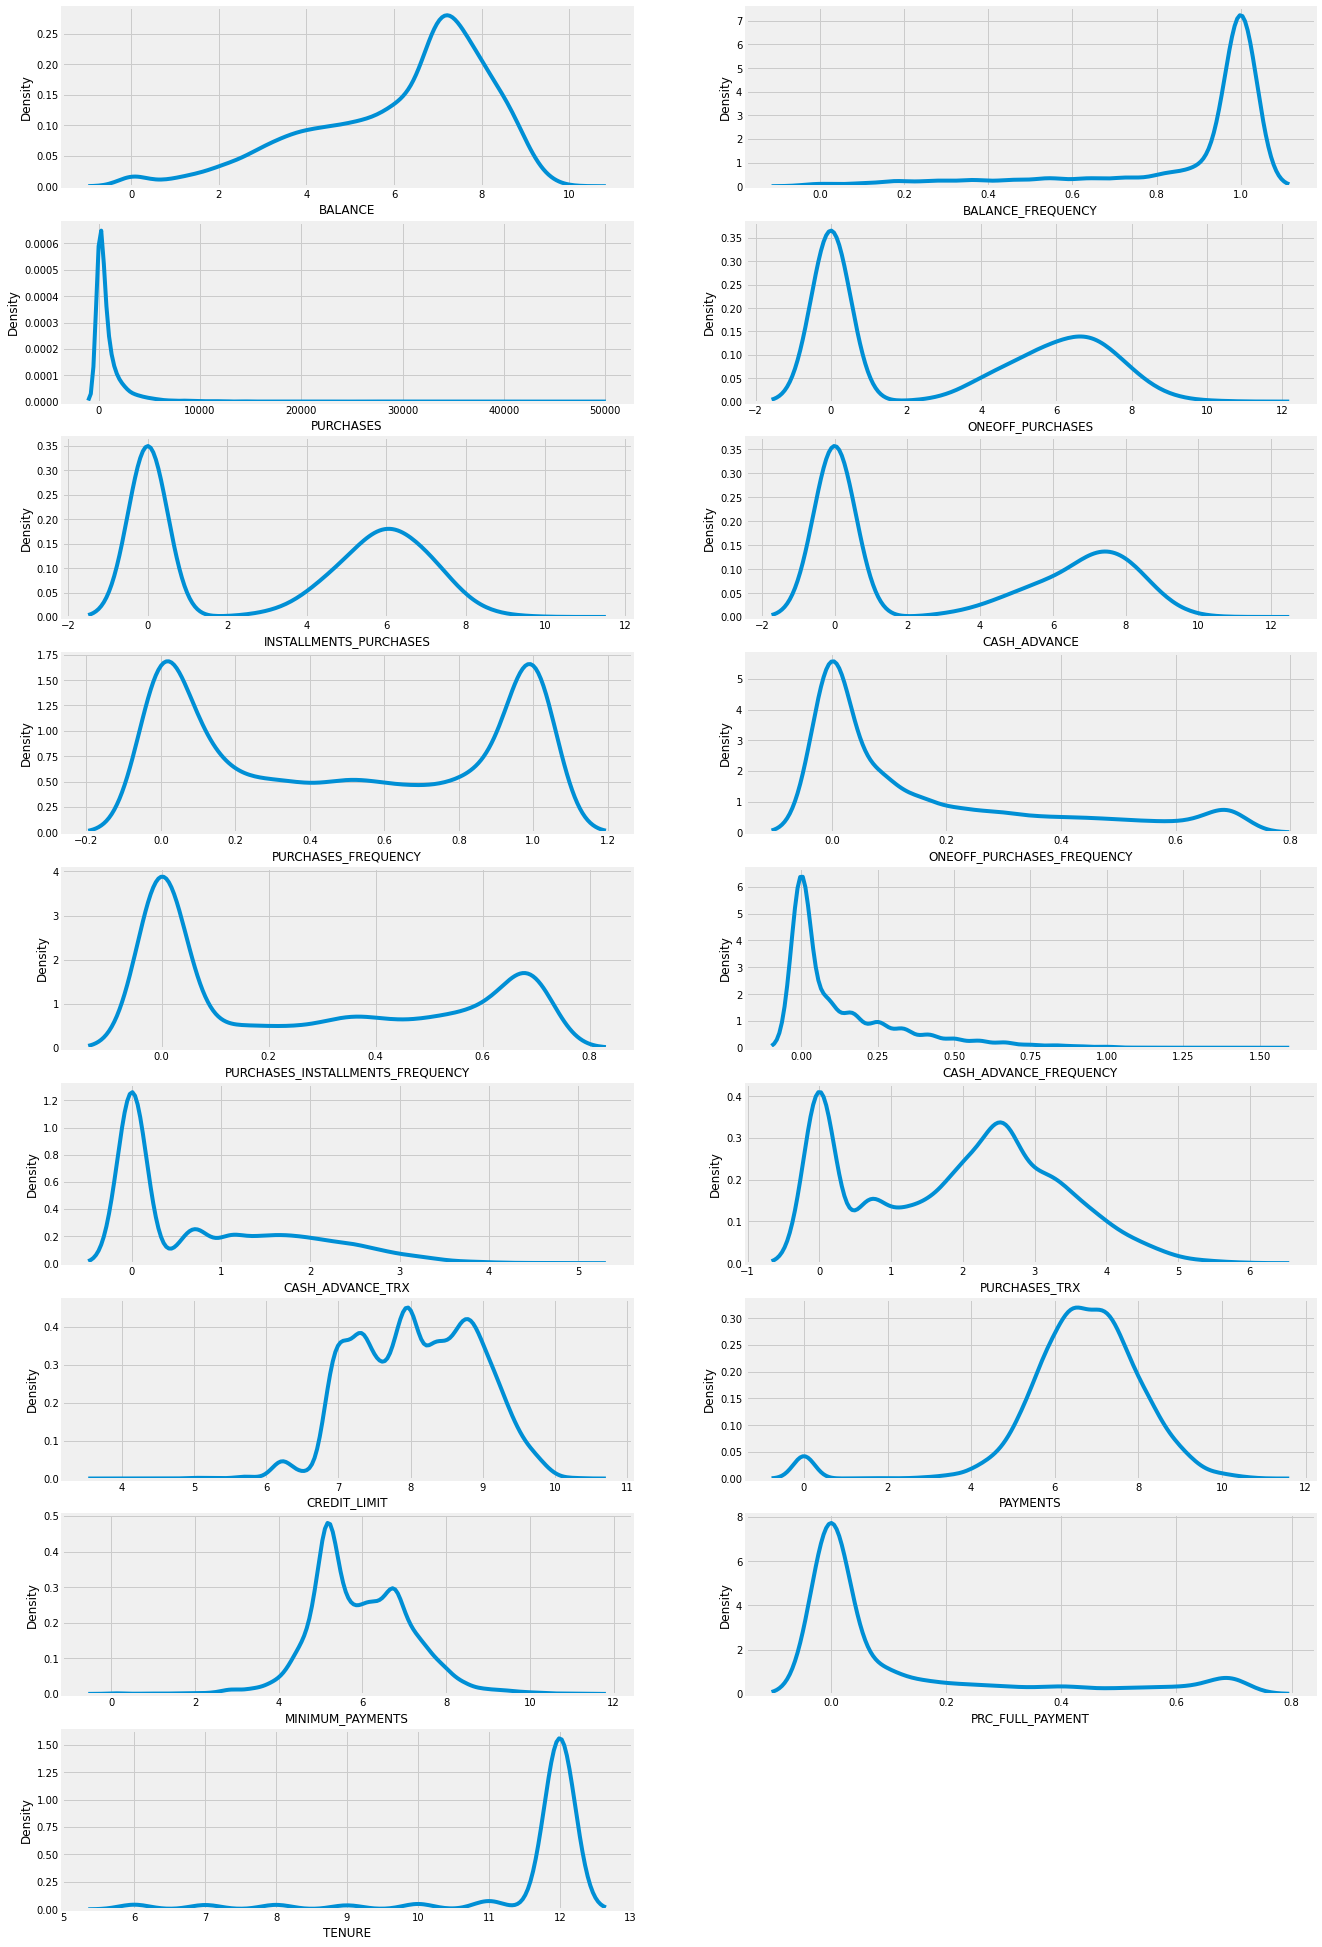

In [18]:
# 查看調整後的偏移狀況
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

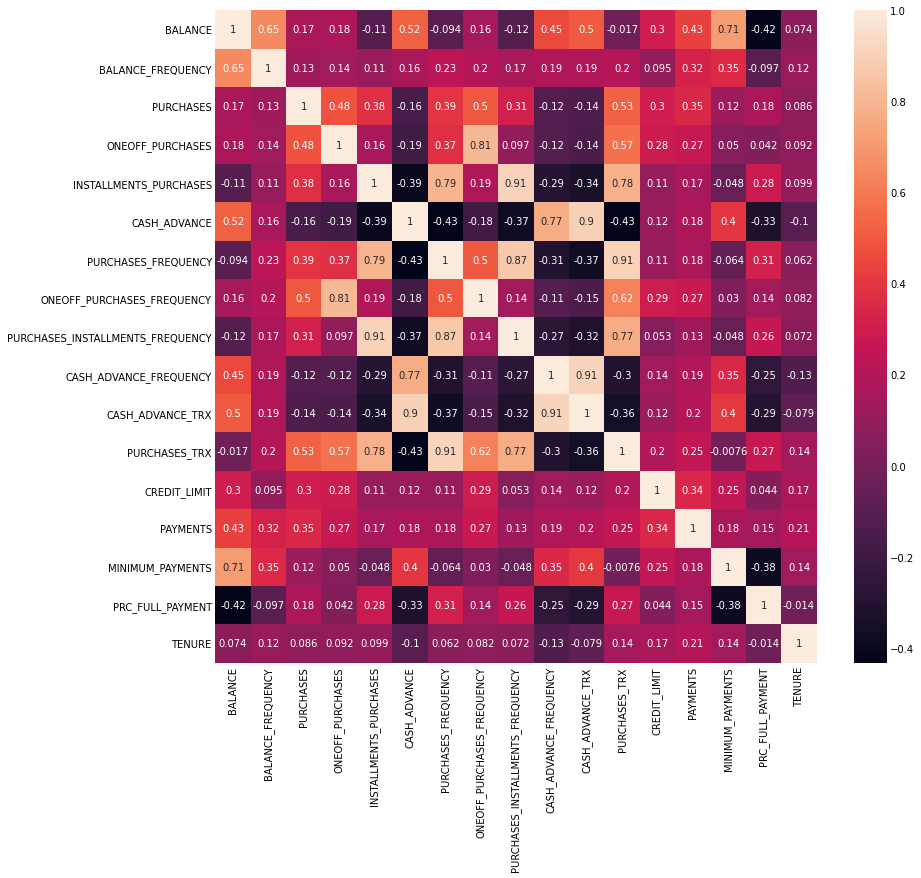

In [19]:
# 查看資料間的相關係數
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:
# 進行PCA降維
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) # 解釋 95% 的變異
X_red = pca.fit_transform(df)
print(pca.explained_variance_) 
print(pca.explained_variance_ratio_)

loadings = pd.DataFrame(pca.components_, columns=df.columns)
loadings.index = ['PC'+str(i+1) for i in range(pca.n_components_)]
loadings

[4565213.39968352]
[0.99999095]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PC1,0.000162,0.000015,0.999999,0.000732,0.000541,-0.000259,0.000074,0.00005,0.000041,-0.000011,-0.000065,0.000341,0.000113,0.00026,0.000067,0.000018,0.000054


In [15]:
# 套件安裝
!pip install threadpoolctl==3.1.0

In [4]:
# 版本更改
!pip install numpy==1.21.4 --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached numpy-1.21.4-cp38-cp38-win_amd64.whl (14.0 MB)


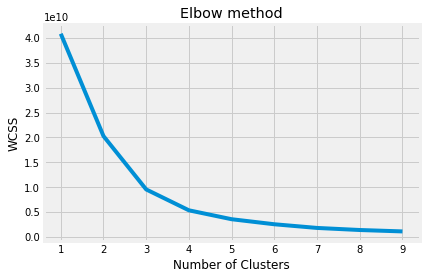

In [21]:
# 透過圖表查看KMeans之elbow
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_red)

KMeans(n_clusters=2)

In [23]:
# 將資料設為kmeans的label
df['cluster_id'] = kmeans.labels_

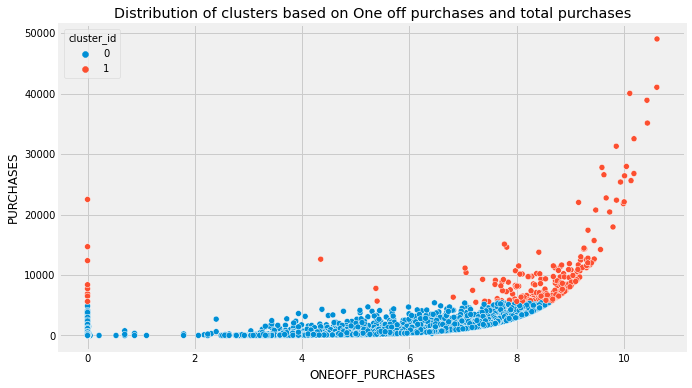

In [24]:
# 未調整回原資料的分群圖表
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

In [25]:
# 將資料調整回未偏移前的狀態
for col in cols:
    df[col] = np.exp(df[col])

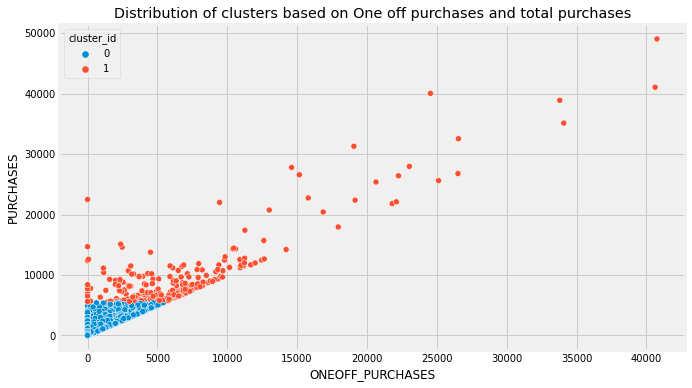

In [26]:
# 相關係數為0.48的 ONEOFF_PURCHASES 和 PURCHASES 分群圖
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

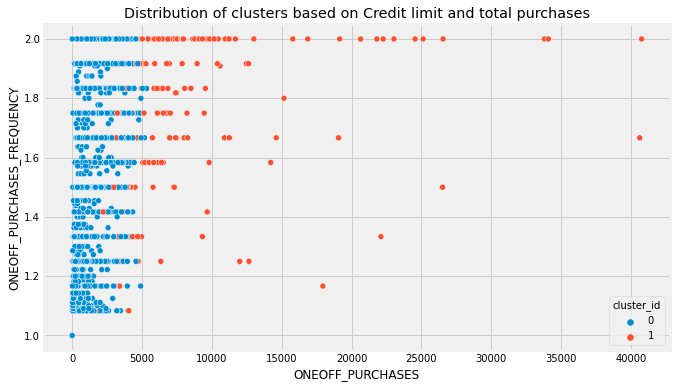

In [27]:
# 相關係數為0.94的 ONEOFF_PURCHASES 和 ONEOFF_PURCHASES_FREQUENCY 分群圖
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='ONEOFF_PURCHASES_FREQUENCY', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

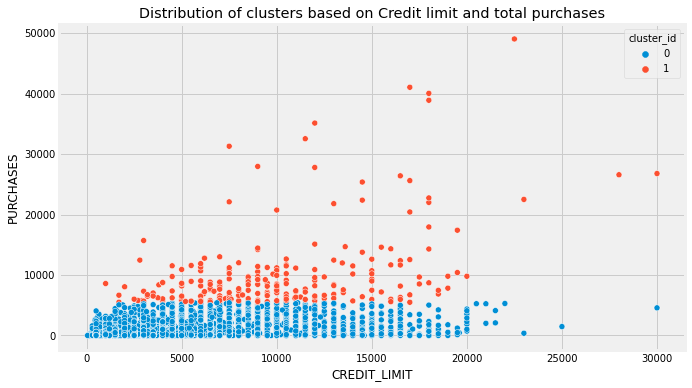

In [28]:
# 相關係數為0.3的 CREDIT_LIMIT 和 PURCHASES 分群圖
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

silhouette_score(X_red, kmeans.labels_)

0.8700541098720719

n_clusters = 2 ，所有樣本的輪廓係數平均 = 0.8700541098720719
n_clusters = 3 ，所有樣本的輪廓係數平均 = 0.7984405397152423
n_clusters = 4 ，所有樣本的輪廓係數平均 = 0.7350723134940188


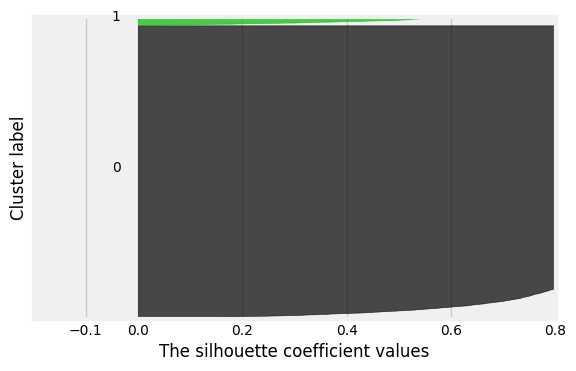

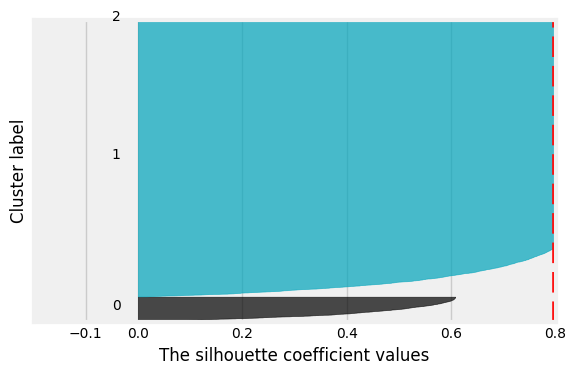

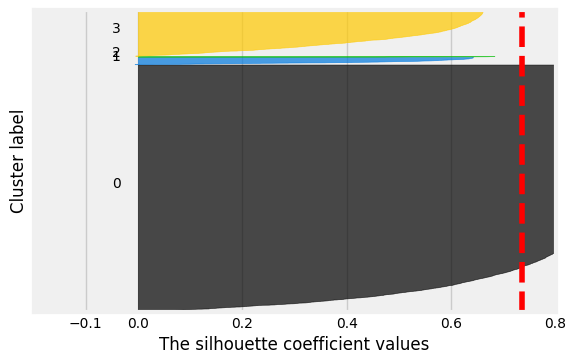

In [31]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in [2, 3, 4]:
    fig, ax = plt.subplots(1, 1, dpi=100)
    # 雖然輪廓係數範圍是[-1, 1]，但這裡只顯示[-0.2, 0.8]之間
    ax.set_xlim([-.2, .8])
    ax.set_ylim([0, len(X_red)+(n_clusters+1)*10])
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_red)
    # 取出分群結果的標籤
    labels = np.unique(y_pred)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_red, y_pred)
    print("n_clusters =", n_clusters,
          "，所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_red, y_pred, 
                                    metric='euclidean')
    y_lower = 10
    for i, c in enumerate(labels):
        c_silhouette = silhouette[y_pred == c]
        c_silhouette.sort()
        size_cluster_i = c_silhouette.shape[0]
        y_upper = y_lower + size_cluster_i
        # 產生顏色編號，並填入區間內
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                         c_silhouette, facecolor=color, 
                         edgecolor=color, alpha=0.7)
        # 標示集群標籤
        ax.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

In [32]:
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(n_clusters=4)
cls.fit(X_red)
cls.labels_

array([3, 3, 1, ..., 3, 3, 1], dtype=int64)

Text(0, 0.5, 'Cluster distance')

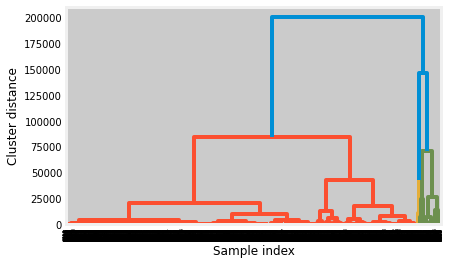

In [39]:
from scipy.cluster import hierarchy

model = hierarchy.linkage(X_red, 'ward')

# 繪製樹狀圖
hierarchy.dendrogram(model, orientation="top", labels=df.index)
plt.xlabel("Sample index")
plt.ylabel('Cluster distance')

In [41]:
# 取出前50 index進行階層式分群
df_X = df[df.index < 50]
df_X.shape

(50, 18)

In [42]:
cls = AgglomerativeClustering(n_clusters=4)
cls.fit(df_X.loc[:, 'BALANCE':'TENURE'])
cls.labels_

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 3, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1], dtype=int64)

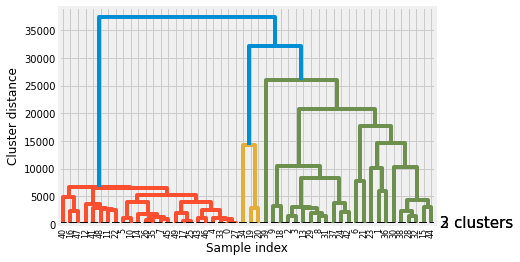

In [45]:
X = df_X.loc[:, 'BALANCE':'TENURE']
model = hierarchy.linkage(X, 'ward')

# 繪製樹狀圖
hierarchy.dendrogram(model, orientation="top", labels=df_X.index)
plt.xlabel("Sample index")
plt.ylabel('Cluster distance')

# 標示橫切線
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [250, 250], '--', c='k', lw=2)
ax.text(bounds[1], 250, ' 2 clusters', va='center', fontdict={'size':15})
ax.plot(bounds, [150, 150], '--', c='k', lw=2)
ax.text(bounds[1], 150, ' 3 clusters', va='center', fontdict={'size':15});

In [46]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=35, min_samples=3).fit(X_red)
clf.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
pd.Series(clf.labels_).value_counts()

 0     8711
-1      103
 6       37
 10       9
 4        8
 5        6
 11       6
 7        5
 21       5
 12       5
 15       4
 9        4
 2        4
 23       4
 20       3
 3        3
 18       3
 13       3
 14       3
 25       3
 17       3
 22       3
 1        3
 24       3
 16       3
 8        3
 19       3
dtype: int64

In [ ]:
"""
本次作業參考資料：

https://www.kaggle.com/code/ankits29/credit-card-customer-clustering-with-explanation/notebook
https://www.kaggle.com/code/sabanasimbutt/clustering-visualization-of-clusters-using-pca
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/code?datasetId=14701&sortBy=voteCount

以及最重要的，課堂上的程式範例
"""